In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/neerajprasad209/Dataset/main/fertility.csv")

In [33]:
df.head()

,Season,Age,Childish_diseases,Accident_or_serious_trauma,Surgical_intervention,High_fevers_in_the_last_year,Frequency_of_alcohol_consumption,Smoking_habit,Number_of_hours_spent_sitting_per_day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Season = le.fit_transform(df.Season.values)
df.Childish_diseases = le.fit_transform(df.Childish_diseases.values)
df.Accident_or_serious_trauma = le.fit_transform(df.Accident_or_serious_trauma.values)
df.Surgical_intervention = le.fit_transform(df.Surgical_intervention.values)
df.High_fevers_in_the_last_year = le.fit_transform(df.High_fevers_in_the_last_year.values)
df.Frequency_of_alcohol_consumption = le.fit_transform(df.Frequency_of_alcohol_consumption.values)
df.Smoking_habit = le.fit_transform(df.Smoking_habit.values)

In [35]:
df.head()

,Season,Age,Childish_diseases,Accident_or_serious_trauma,Surgical_intervention,High_fevers_in_the_last_year,Frequency_of_alcohol_consumption,Smoking_habit,Number_of_hours_spent_sitting_per_day,Diagnosis
0,1,30,0,1,1,1,2,2,16,Normal
1,1,35,1,0,1,1,2,0,6,Altered
2,1,27,1,0,0,1,1,1,9,Normal
3,1,32,0,1,1,1,1,1,7,Normal
4,1,30,1,1,0,1,2,1,9,Altered


In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
X.head()

,Season,Age,Childish_diseases,Accident_or_serious_trauma,Surgical_intervention,High_fevers_in_the_last_year,Frequency_of_alcohol_consumption,Smoking_habit,Number_of_hours_spent_sitting_per_day
0,1,30,0,1,1,1,2,2,16
1,1,35,1,0,1,1,2,0,6
2,1,27,1,0,0,1,1,1,9
3,1,32,0,1,1,1,1,1,7
4,1,30,1,1,0,1,2,1,9


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    int32 
 1   Age                                    100 non-null    int64 
 2   Childish_diseases                      100 non-null    int32 
 3   Accident_or_serious_trauma             100 non-null    int32 
 4   Surgical_intervention                  100 non-null    int32 
 5   High_fevers_in_the_last_year           100 non-null    int32 
 6   Frequency_of_alcohol_consumption       100 non-null    int32 
 7   Smoking_habit                          100 non-null    int32 
 8   Number_of_hours_spent_sitting_per_day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int32(7), int64(2), object(1)
memory usage: 5.2+ KB


In [39]:
y.head()

0     Normal
1    Altered
2     Normal
3     Normal
4    Altered
Name: Diagnosis, dtype: object

In [40]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.15, random_state=12)

In [41]:
Xtrain.shape, Xtest.shape

((85, 9), (15, 9))

In [42]:
ytrain.shape, ytest.shape 

((85,), (15,))

In [43]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [44]:
model.fit(Xtrain,ytrain)

DecisionTreeClassifier()

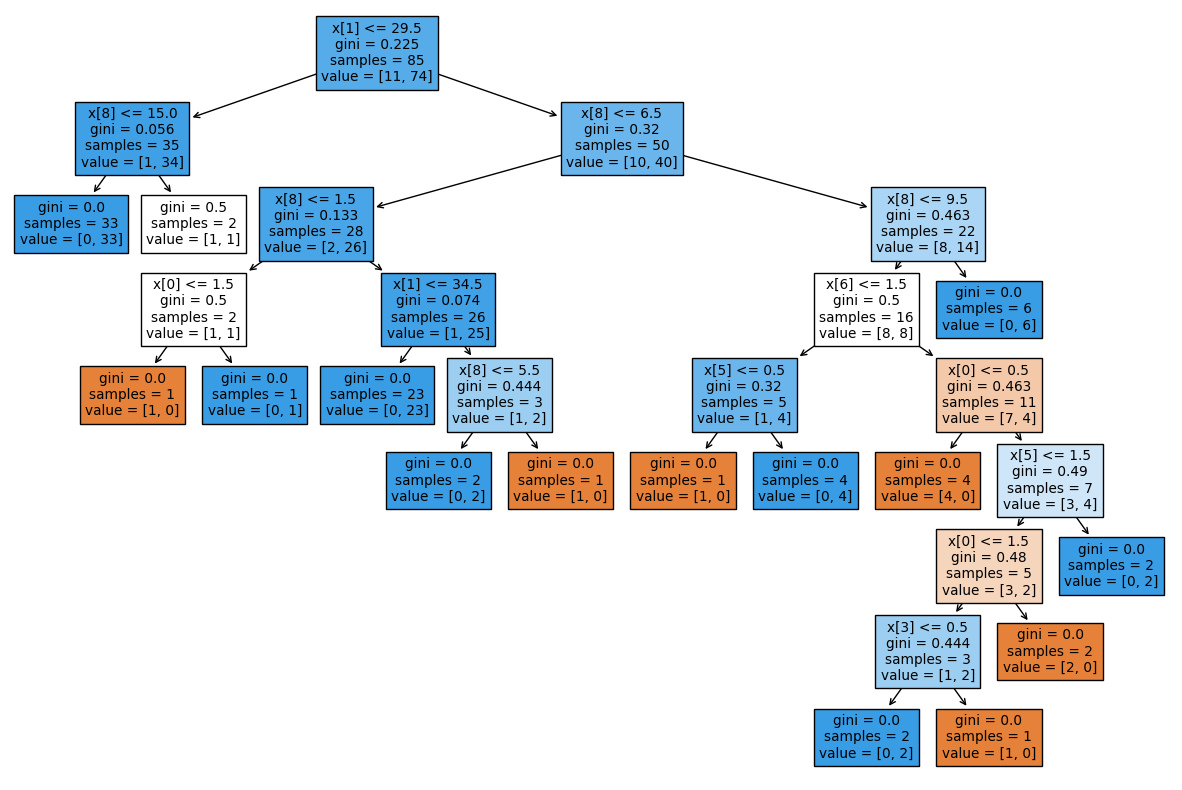

In [45]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [46]:
classifer = DecisionTreeClassifier(max_depth=2)

classifer.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

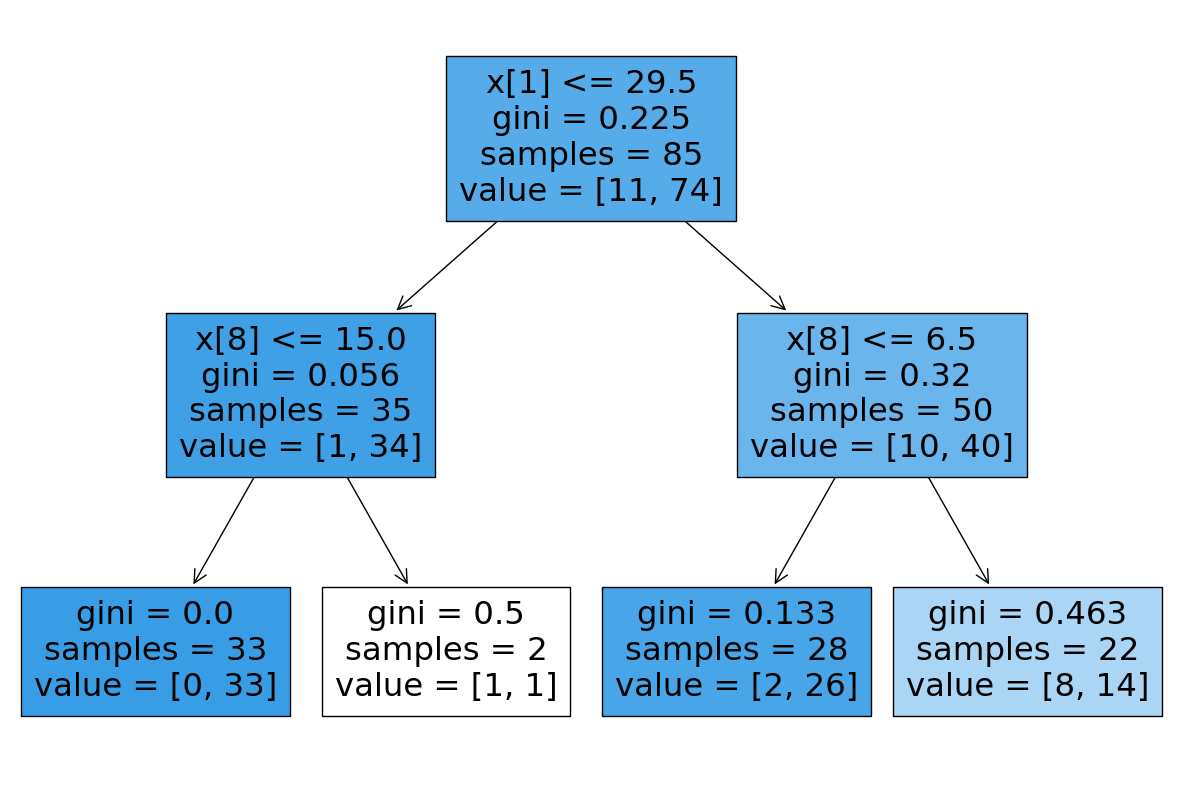

In [47]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifer,filled=True)
plt.show()

In [48]:
ypred = classifer.predict(Xtest)

In [49]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy Score: {accuracy_score(ypred,ytest)*100}")
print("\n=======================================================================\n")
print(f"Classification Report :\n{classification_report(ypred,ytest)}")

Accuracy Score: 86.66666666666667


Classification Report :
              precision    recall  f1-score   support

     Altered       0.00      0.00      0.00         1
      Normal       0.93      0.93      0.93        14

    accuracy                           0.87        15
   macro avg       0.46      0.46      0.46        15
weighted avg       0.87      0.87      0.87        15

